In [285]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib

In [286]:
d = pd.read_csv(r'C:\Users\Lenovo\Dropbox\My PC (DESKTOP-BHVANOA)\Desktop\clustering.csv')
df = d.loc[:, ['ApplicantIncome', 'LoanAmount']]
df.head()

,ApplicantIncome,LoanAmount
0,4583,128.0
1,3000,66.0
2,2583,120.0
3,6000,141.0
4,2333,95.0


# Plot Datapoints

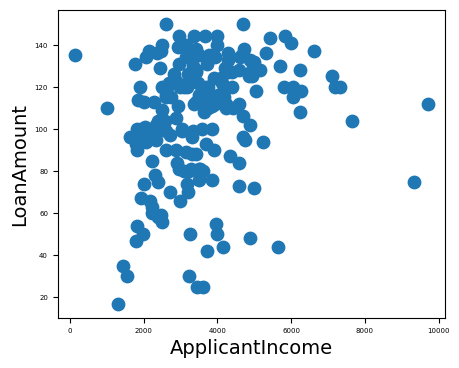

In [287]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(x=data['ApplicantIncome'], y=data['LoanAmount'], s=80)
ax.set_xlabel(r'ApplicantIncome', fontsize=14)
ax.set_ylabel(r'LoanAmount', fontsize=14)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()

#  Finding distance between a point and its nearest data point

In [288]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df[['ApplicantIncome','LoanAmount']])
# distances between a data point and its nearest data point
distances, indices = nbrs.kneighbors(df[['ApplicantIncome','LoanAmount']]) 
distances

array([[0.00000000e+00, 1.60000000e+01, 3.35410197e+01, 4.40000000e+01,
        5.75673519e+01],
       [0.00000000e+00, 4.39317653e+01, 4.55411901e+01, 5.75847202e+01,
        6.21288983e+01],
       [0.00000000e+00, 1.60000000e+01, 1.74642492e+01, 1.77200451e+01,
        2.70185122e+01],
       [0.00000000e+00, 5.19711458e+01, 5.42309875e+01, 1.79025138e+02,
        1.82214160e+02],
       [0.00000000e+00, 5.83095189e+00, 7.00000000e+00, 3.62353419e+01,
        5.26307895e+01],
       [0.00000000e+00, 3.32415403e+01, 4.51220567e+01, 4.60977223e+01,
        5.11957029e+01],
       [0.00000000e+00, 5.00000000e+00, 1.02956301e+01, 1.10000000e+01,
        3.22490310e+01],
       [0.00000000e+00, 1.88679623e+01, 2.78028775e+01, 2.86530976e+01,
        3.80788655e+01],
       [0.00000000e+00, 1.44128415e+02, 2.39353295e+02, 3.13129366e+02,
        3.35435538e+02],
       [0.00000000e+00, 1.92353841e+01, 5.04876222e+01, 5.96154342e+01,
        6.35059052e+01],
       [0.00000000e+00, 2.0396

# Plotting K-distance Graph

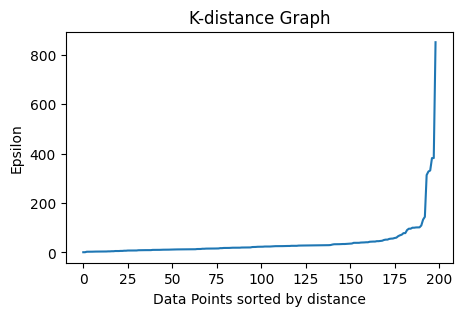

In [289]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(5,3))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

# Finding the value of epsilon and minPoints

In [290]:
dbscan_opt=DBSCAN(eps=155,min_samples=5)
dbscan_opt.fit(df[['ApplicantIncome','LoanAmount']])

DBSCAN(eps=155)

# Labels 

In [291]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()
# label of noise data points = -1

 1    153
-1     25
 0     21
Name: DBSCAN_opt_labels, dtype: int64

# Plot Clusters

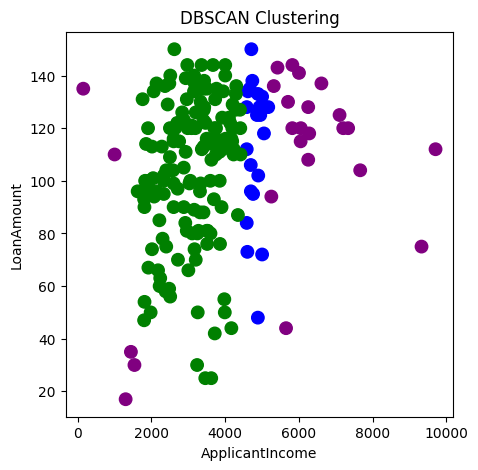

In [292]:
colors=['purple','red','blue','green']
plt.figure(figsize=(5,5))
plt.scatter(df['ApplicantIncome'],df['LoanAmount'],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=80)
plt.title('DBSCAN Clustering')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()